mse :  22309.629307854975
psnr :  4.645880066706053


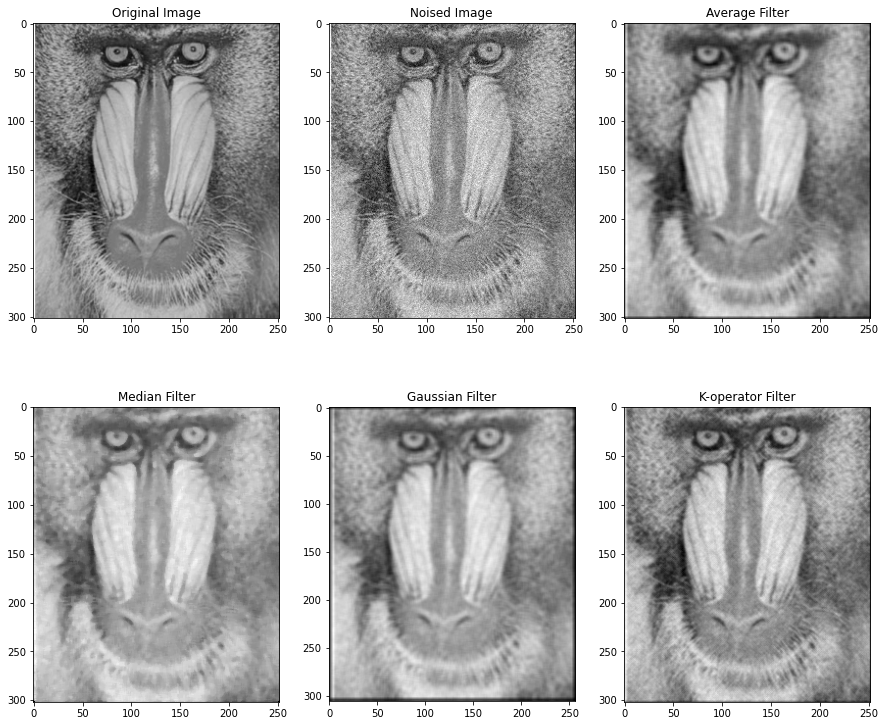

In [10]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

def padding(image):
    row=image.shape[0]
    col=image.shape[1]

    new_image = np.zeros([row+4,col+4],dtype='float')
    for i in range(row+4):
        for j in range(col+4):
            if i==0 or i==row+2 or i==1 or i==row+3:
                new_image[i,j]=0
            elif j==0 or j==col+2 or j==1 or j==col+3:
                new_image[i,j]=0
            else:
                new_image[i,j]=image[i-2,j-2]
    return new_image

def MeanFilter(image,new_image, filter_size):
    row=new_image.shape[0]
    col=new_image.shape[1]
    # create an empty array with same size as input image
    output = np.zeros(image.shape,float)
    # creat an empty variable
    result = 0
    # deal with filter size = 3x3
    if filter_size == 9:
        for i in range(1, row+1):
            for j in range(1,col+1):
                for x in range(-1, 2):
                    for y in range(-1, 2):
                        result = result + new_image[i+x, j+y]
                #print(result)
                output[i][j] =result / filter_size
                result = 0
    elif filter_size == 25:
        for i in range(2,row-2):
            for j in range(2,col-2):
                for y in range(-2, 3):
                    for x in range(-2, 3):
                        result = result + new_image[i+x, j+y]
                output[i-2][j-2] =result/filter_size
                result = 0
    return output

def MedianFilter(img,image,filter_size):
    # create the kernel array of filter as same size as filter_size
    filter_array = [image[0][0]] * filter_size
    row=image.shape[0]
    col=image.shape[1]
    # create an empty array with same size as input image
    output = np.zeros(img.shape,float)
    if filter_size == 9:
        for j in range(1, image.shape[0]-1):
            for i in range(1, image.shape[1]-1):
                filter_array[0] = image[j-1, i-1]
                filter_array[1] = image[j, i-1]
                filter_array[2] = image[j+1, i-1]
                filter_array[3] = image[j-1, i]
                filter_array[4] = image[j, i]
                filter_array[5] = image[j+1, i]
                filter_array[6] = image[j-1, i+1]
                filter_array[7] = image[j, i+1]
                filter_array[8] = image[j+1, i+1]

                # sort the array
                filter_array.sort()

                # put the median number into output array
                output[j][i] = filter_array[4]

    # deal with filter size = 5x5
    elif filter_size == 25:
        for j in range(2, row-2):
            for i in range(2, col-2):
                filter_array[0] = image[j-2, i-2]
                filter_array[1] = image[j-1, i-2]
                filter_array[2] = image[j, i-2]
                filter_array[3] = image[j+1, i-2]
                filter_array[4] = image[j+2, i-2]
                filter_array[5] = image[j-2, i-1]
                filter_array[6] = image[j-1, i-1]
                filter_array[7] = image[j, i-1]
                filter_array[8] = image[j+1, i-1]
                filter_array[9] = image[j+2, i-1]
                filter_array[10] = image[j-2, i]
                filter_array[11] = image[j-1, i]
                filter_array[12] = image[j, i]
                filter_array[13] = image[j+1, i]
                filter_array[14] = image[j+2, i]
                filter_array[15] = image[j-2, i+1]
                filter_array[16] = image[j-1, i+1]
                filter_array[17] = image[j, i+1]
                filter_array[18] = image[j+1, i+1]
                filter_array[19] = image[j+2, i+1]
                filter_array[20] = image[j-2, i+2]
                filter_array[21] = image[j-1, i+2]
                filter_array[22] = image[j, i+2]
                filter_array[23] = image[j+1, i+2]
                filter_array[24] = image[j+2, i+2]

                # sort the array
                filter_array.sort()

                # put the median number into output array
                output[j-2][i-2] = filter_array[12]
    return output

def koperator(image,new_image,p,q,a):
     
    #dimensions of input image
    row = len(new_image)
    col = len(new_image[0])
    
    x=math.pi
    #find  gamma value using gamma function
    g1=math.gamma((2-a)/2)
    #now put these value in y1
    y1=((2**(a))*(x))/g1
    #as giving in paper in Table 2 superposition in all eight direction we need to coffiecient Co and C1
    Co=(p+q)/(2*a*y1)
    C1=((2**(a))*p)/(2*a*y1)
    C2=(p*(2**a-1))/(2*a*y1)
    # create the mask array of filter as same size as filter_size of 9 beacuse 3X3 having size 9
    mask = np.zeros([5,5],dtype='float')
    
    #Normalization of the filter mask
    total=(8*Co)+8*(C1)+8*(C2)
    for i in range(5):
        for j in range(5):
            if i==2 and j==2:
                mask[i][j]=(8*Co)/total
            elif i==0 and j%2==0:
                mask[i][j]=C2/total
            elif i%2==0 and j==0:
                mask[i][j]=C2/total
            elif i==4 and j%2==0:
                mask[i][j]=C2/total
            elif j==4 and i%2==0:
                mask[i][j]=C2/total   
            elif i==0 and j%2==1 or i==4 and j%2==1 or j==0 and i%2==1 or j==4 and i%2==1:
                mask[i][j]=0
            else:
                mask[i][j]=C1/total
       
    #apply Fractional-Mask
    output = np.zeros(image.shape,float)
    result = 0
    #convolution
    for i in range(2,row-2):
            for j in range(2,col-2):
                for x in range(-2, 3):
                    for y in range(-2, 3):
                        result = result + new_image[i+x, j+y]*mask[x+2,y+2]
                output[i-2][j-2] = result
                result = 0

    return output
def mseerror(finalimg,img):
    error = 0
    row = len(img)
    col = len(img[0])
    for i in range(0,row):
        for j in range(0,col):
            k=img[i,j]-finalimg[i,j] 
            error = error + (k*k)
    error = error/((row)*(col))
    return error

def psnrerror(mse):
    psnr=20*math.log10(((2**8)-1)/math.sqrt(mse))
    return psnr

#this is main function 
if __name__ == '__main__':
     
    #import the image and stor it in variable "img"
    img = cv2.imread('img3.png')
    
    #convert original image to grayscale image
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    #Add noise to the GrayImage
    noised = random_noise(gray,mode='gaussian',var=0.005)
    
    # gray1=gray+noised
    gray1 = noised
    
    #add padding
    grayImg=padding(gray1)
    
    
    avgFilter = MeanFilter(gray1,grayImg,25)
    
    medFilter = MedianFilter(gray1,grayImg,25)
    
    #filter the image using K-Operator by calling function koperator and pass image as argument
    koperatorFilter = koperator(gray1,grayImg,1.05,0,1.04)
    
    #Here gaussian filter is applied using inbuilt function provided by cv2(OpenCv)
    gaussianFilter = cv2.GaussianBlur(grayImg,(5,5),cv2.BORDER_DEFAULT)

    fig = plt.figure()
    fig.set_figheight(20)
    fig.set_figwidth(15)
    
    # display the oringinal image
    fig.add_subplot(3, 3, 1)
    plt.title('Original Image')
    plt.imshow(gray, cmap='gray')
    
    # display the noised image
    fig.add_subplot(3, 3, 2)
    plt.title('Noised Image')
    plt.imshow(gray1, cmap='gray')

    fig.add_subplot(3, 3, 3)
    plt.title('Average Filter')
    plt.imshow(avgFilter, cmap='gray')
    
    fig.add_subplot(3, 3, 4)
    plt.title('Median Filter')
    plt.imshow(medFilter, cmap='gray')
    
    fig.add_subplot(3, 3, 5)
    plt.title('Gaussian Filter')
    plt.imshow(gaussianFilter, cmap='gray')
    
    fig.add_subplot(3, 3, 6)
    plt.title('K-operator Filter')
    plt.imshow(koperatorFilter, cmap='gray')
    
    mse = mseerror(koperatorFilter,gray)
    psnr = psnrerror(mse)
    print("mse : ", mse)
    print("psnr : ", psnr)
    